#mathamatical transformation

1)log transform

2)reciprocal tranform

3)power (sqr root)

4)box cox

5)yeo-jhonson

hota kya hai?  ise mere data ka distribution i.e pdf normal distibution mai convert hojata hai (normal distribution wo maths wala graph)

we dont get data in normal distribution form we have to convert all

normal distributions is main thing to solve,
liner regression and logistic mai kaam aata hai yeh better perform karega

custom formula bhi bana sakte hai lekin wo close to normal dist hona chaiye


sklearn mai 3 transformation hai

1)function transformer(log , reciprocal, sqr root, custom)

2)power transformer( box cox, yeo jhonson)

3)quanttile transformer


kaise pata chalega ki normal hai ki nahi??
sns.distplot() isse aandaza lag jata hai

pd.skew(0,1,-1)

Q-Qplot(future)


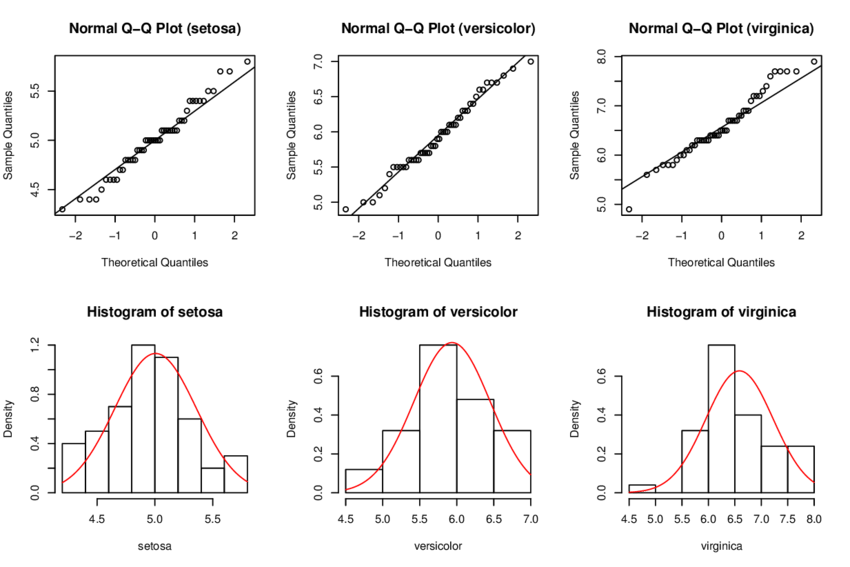

#log transform

just take the log of all values

NA applicable to -ve values

right skewed data pe log tranformation lagao to center mai aajata hai fir

additive values ko multiplicative mai le aata hai 10-0,
100-10, aaise liner algoes ka performance bhad jati hai

#reciporcal transformation(1/x)


#square transformation

used for left skewed normal distribution

#sqrt transformation



In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats  #gonna used for qqplot

import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("/content/train.csv",usecols=['Age','Fare','Survived'])

In [ ]:
# to use perticular columns only  then use use columns with the above read csv command

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-16-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

/tmp/ipython-input-28-2569550785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


<function matplotlib.pyplot.show(close=None, block=None)>

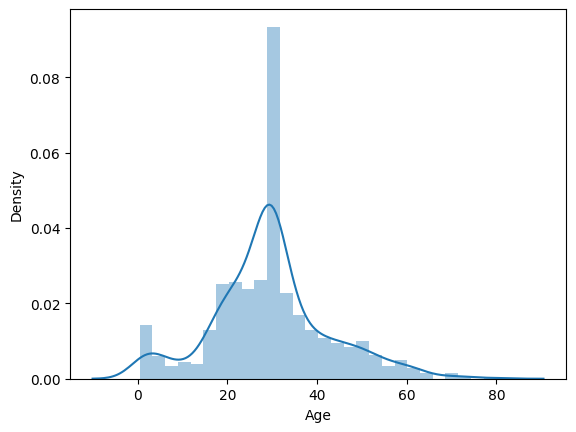

In [ ]:
sns.distplot(x_train['Age'])
plt.show


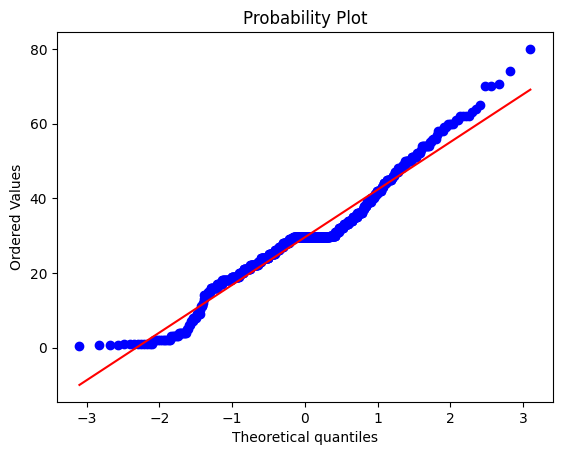

In [ ]:
import matplotlib.pyplot as plt
stats.probplot(x_train['Age'], dist='norm', plot=plt)

plt.show()

/tmp/ipython-input-29-3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

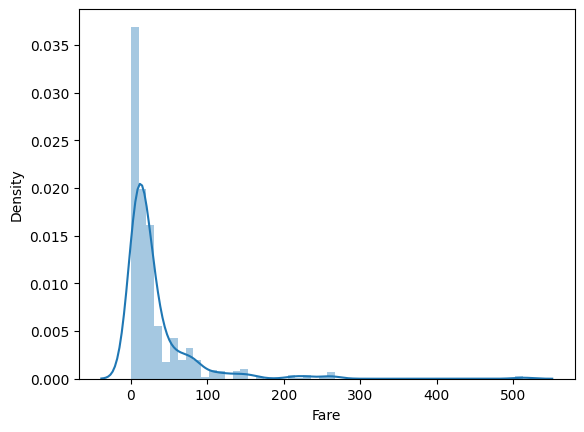

In [ ]:
sns.distplot(df['Fare'])

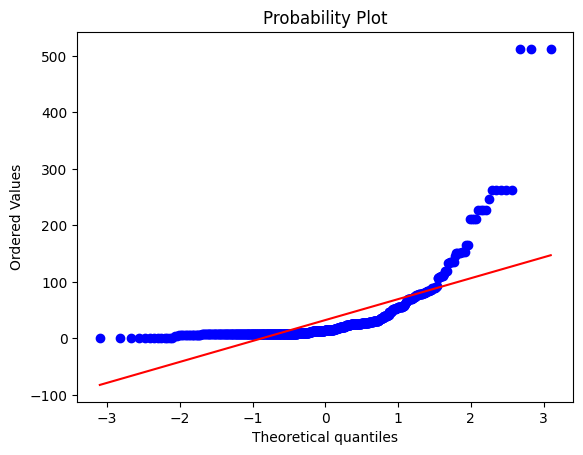

In [ ]:
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.show()   #right skewed

In [ ]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)



In [ ]:
accuracy_score(y_pred,y_test)

0.6480446927374302

In [ ]:
accuracy_score(y_pred2,y_test)

0.6703910614525139

In [ ]:
trf=FunctionTransformer(func=np.log1p)

#np.log -- mai zero aay to dikkat hai fir
#np.log1p == will add 1 it slf fir usme koi valu zero nahi hogi


In [ ]:
x_train_tranformed=trf.fit_transform(x_train)
x_test_tranformed=trf.fit_transform(x_test)

In [ ]:
clf1.fit(x_train_tranformed,y_train)
clf2.fit(x_train_tranformed,y_train)

y_pred3=clf1.predict(x_test_tranformed)
y_pred4=clf2.predict(x_test_tranformed)

In [ ]:
accuracy_score(y_pred3,y_test)

0.6815642458100558

In [ ]:
accuracy_score(y_test,y_pred4)

0.664804469273743

In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6589013732833957


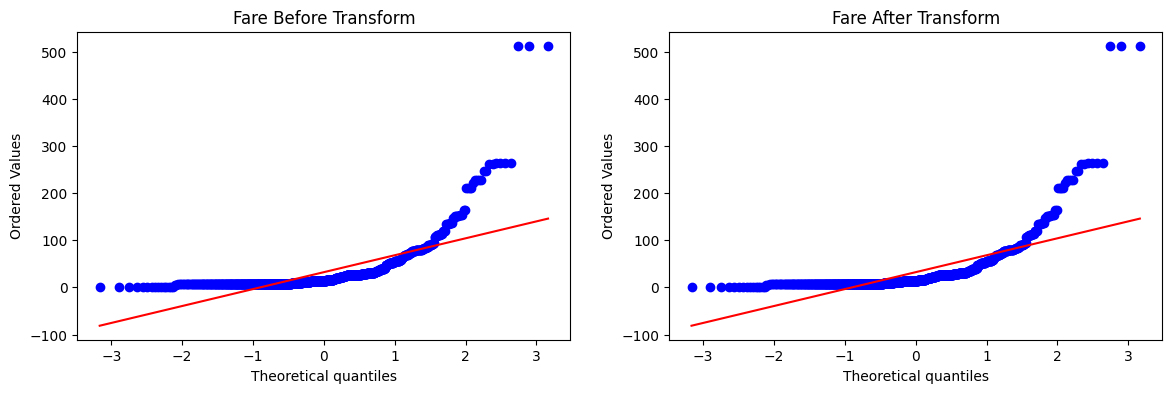

In [ ]:
apply_transform(lambda x:x)

Accuracy 0.6431335830212235


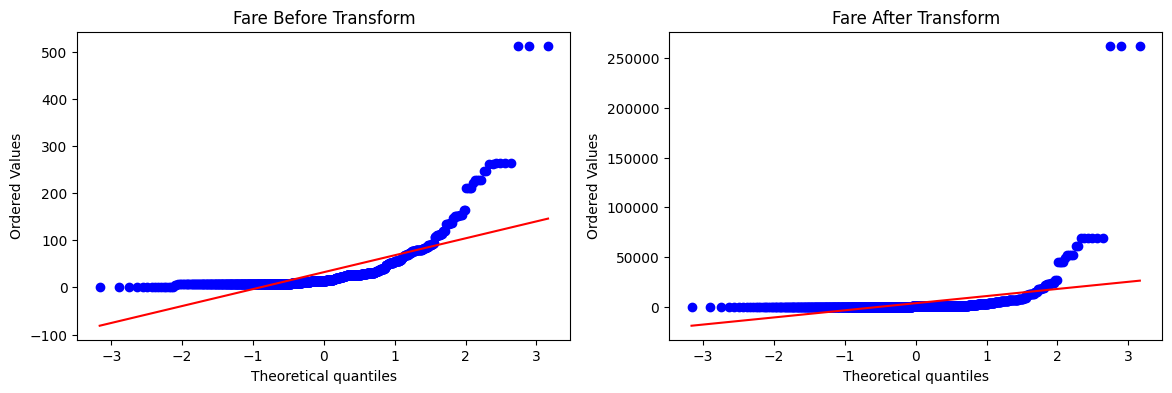

In [ ]:
apply_transform(lambda x:x**2)

Accuracy 0.61729088639201


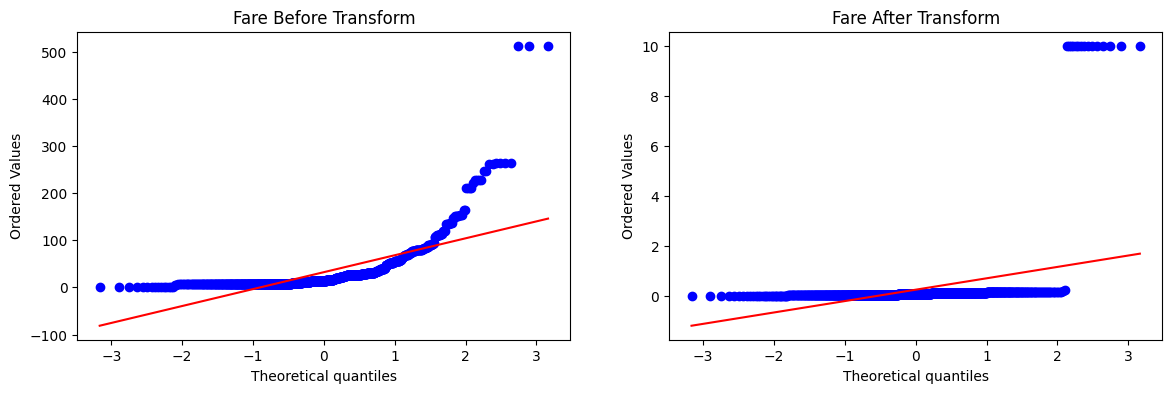

In [ ]:
apply_transform(lambda x:1/(x+0.1))

#power transformer

#box cox

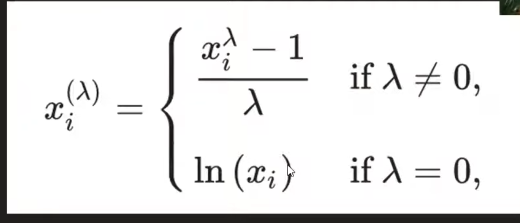

The exponent here is a variable called Lambda that varies over range of 5 to -5 and in the process of searching we examine all the values of Lambda finally we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable

In [ ]:
#only for x>0 and foe non negetive number

#yeo-jhonson

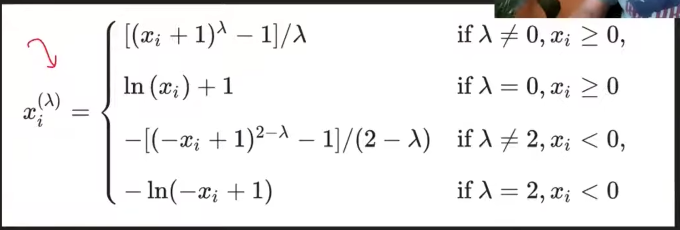

This transformation is somewhat of the adjustment to the box of transformation by which we can apply it to negative numbers and numbers which are greater than zero

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
df=pd.read_csv('/content/concrete_data.csv')

In [ ]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
409,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,3,14.94
401,475.0,0.0,0.0,162.0,9.5,1044.0,662.0,28,58.52
666,192.0,288.0,0.0,192.0,0.0,929.8,716.1,3,12.79
523,359.0,19.0,141.0,154.0,10.9,942.0,801.0,28,62.94
677,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Strength'],axis=1),df['Strength'],test_size=0.2,random_state=42)

#w/o transformation

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)


In [ ]:
r2_score(y_predict,y_test)

#not an accuracy score because its not  classification model refression mai r2 score calculate hoga

0.4231704797890976

In [ ]:
#cross validation

np.mean(cross_val_score(lr,x_train,y_train,scoring='r2'))

np.float64(0.5946055391992531)

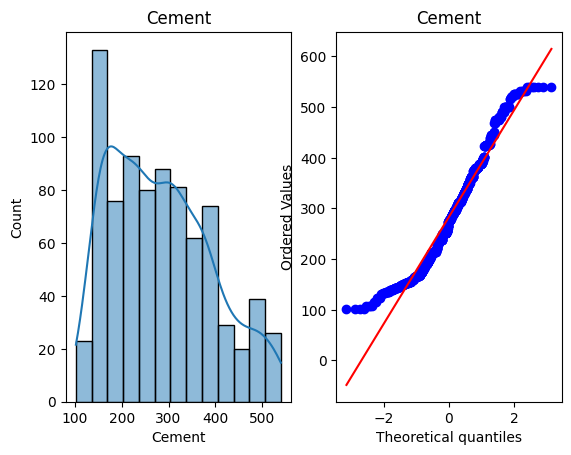

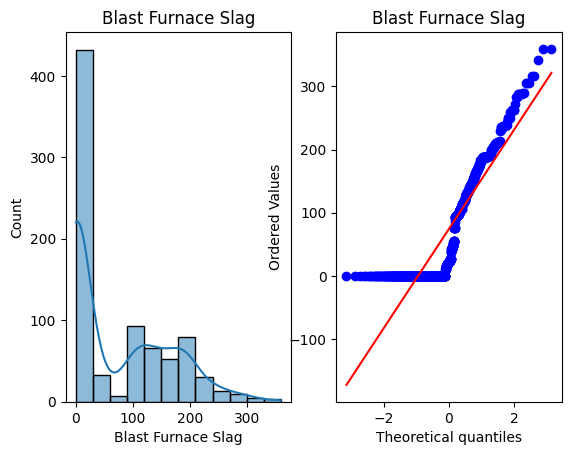

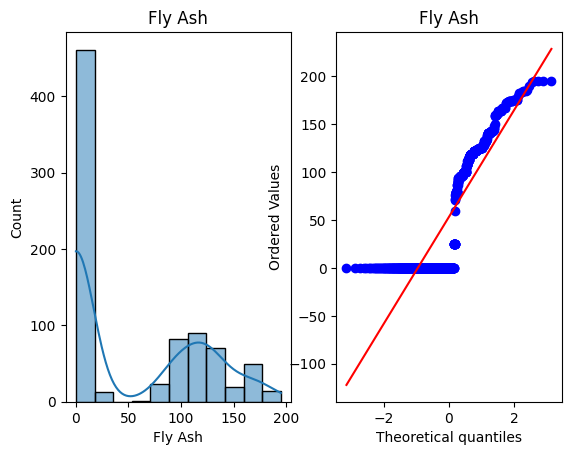

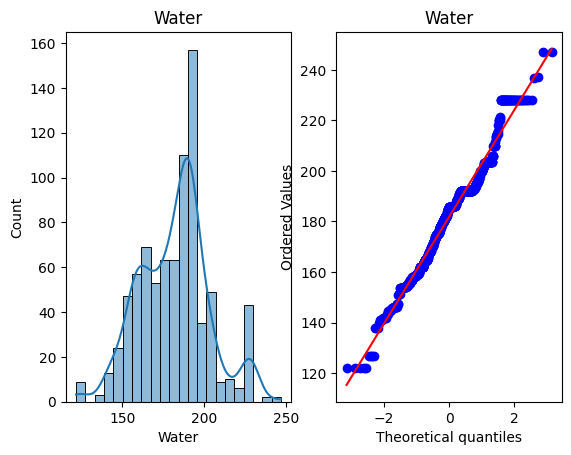

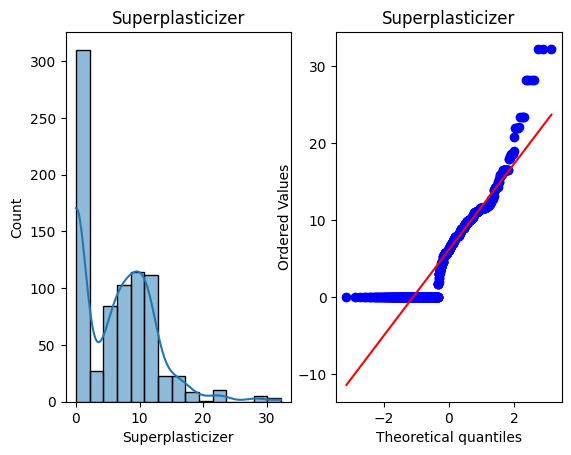

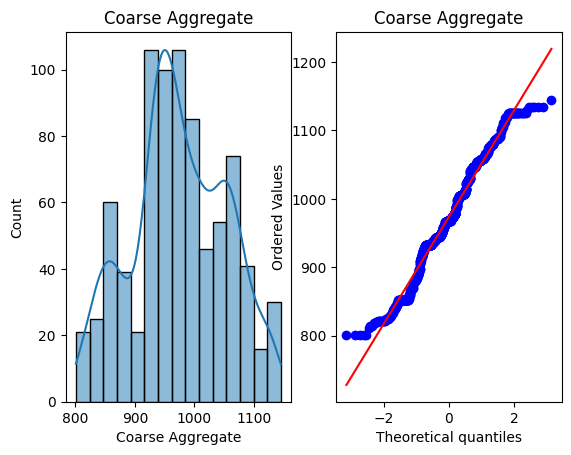

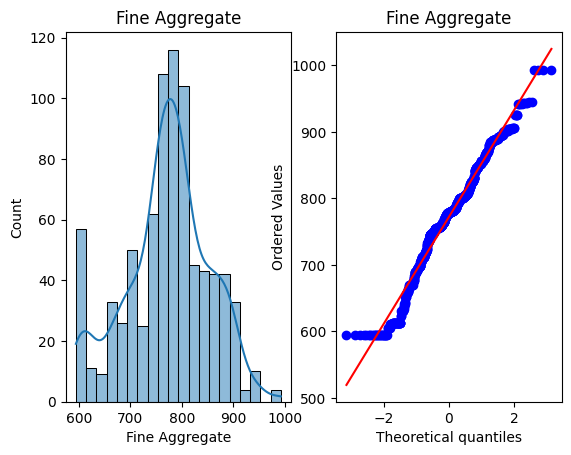

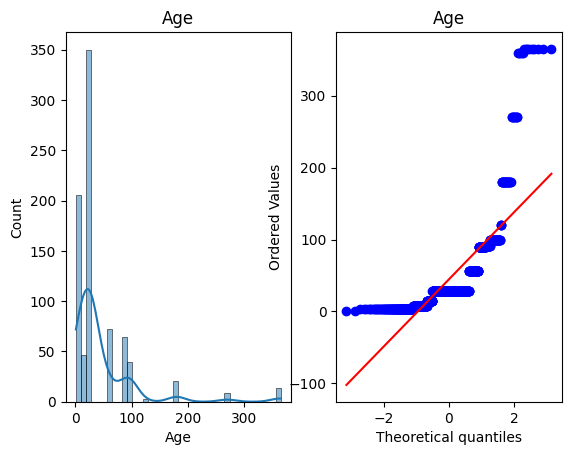

In [ ]:
#plotting
import matplotlib.pyplot as plt
for col in x_train.columns:

    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

#apply box-cox

In [33]:
#is a monotonic transformation that are applied to make dta more gausian like.
#yaha scale karne ki zaroorat nahi hota inbult hojata hai (remb this point) internal scaler
#by default yeo jhonson deta hai

In [35]:
pt =PowerTransformer(method='box-cox')
x_train_transform=pt.fit_transform(x_train+0.000001)
x_test_transform=pt.fit_transform(x_test+0.000001)

In [38]:
#har column kr liye lambda nikal raha hai
pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_})

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['box-cox_lambdas'].plot(kind='line', figsize=(8, 4), title='box-cox_lambdas')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['cols'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='cols', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['cols'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='box-cox_lambdas', y='cols', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,cols,box-cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


eg -> (550)^lambda ie  (550)^0.177

In [42]:
#applying regression model
lr=LinearRegression()
lr.fit(x_train_transform,y_train)
y_predict=lr.predict(x_test_transform)

In [43]:
r2_score(y_predict,y_test)

0.7743427819648891

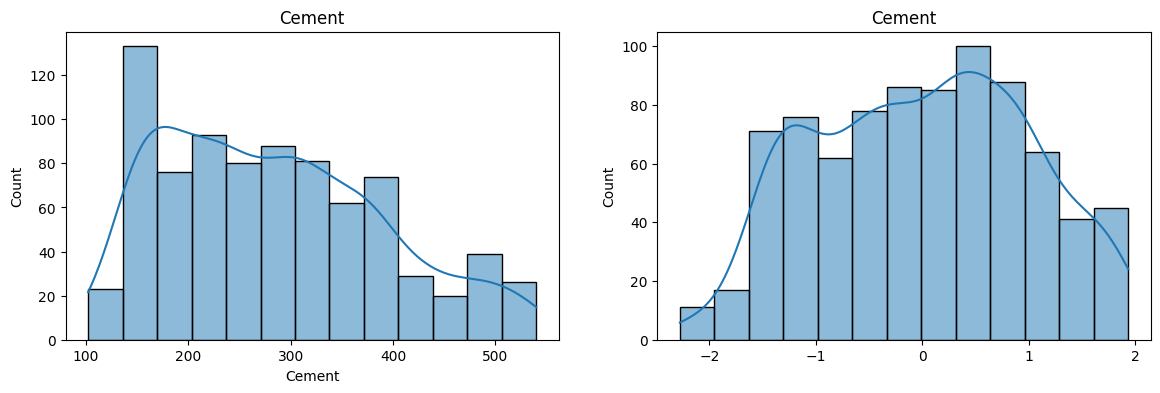

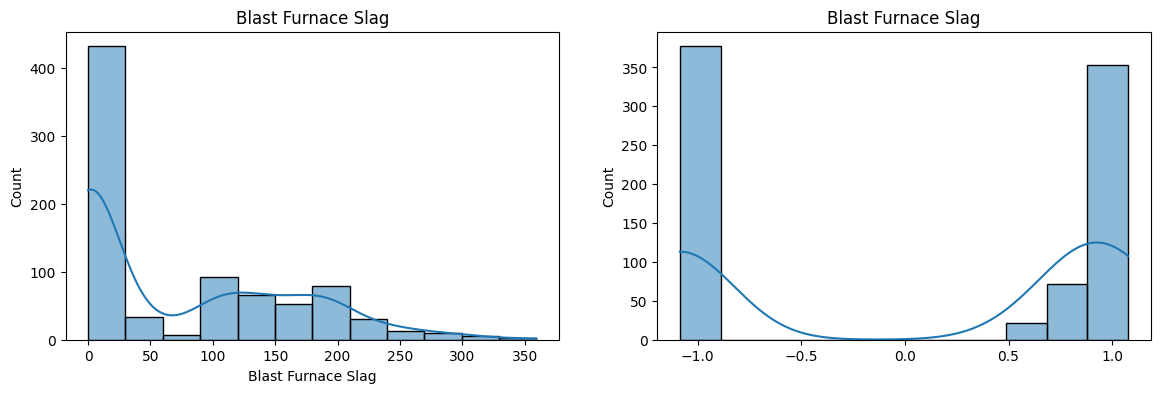

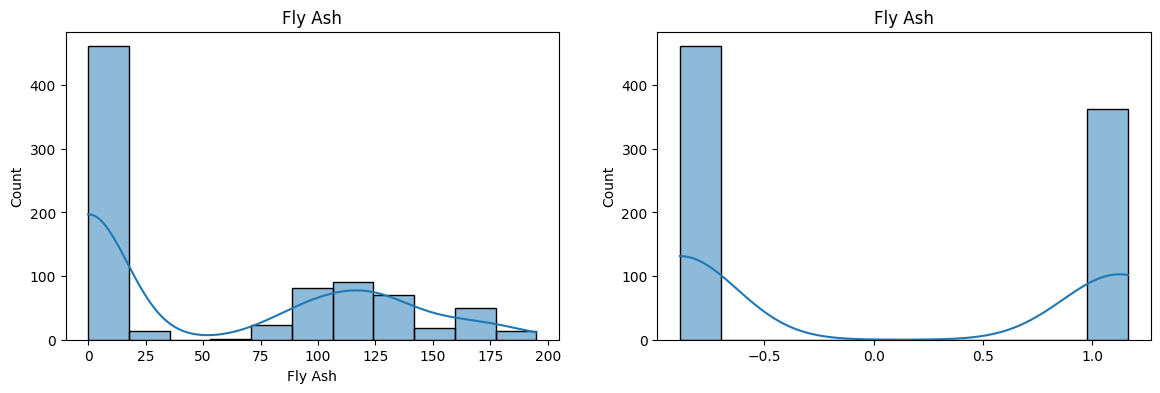

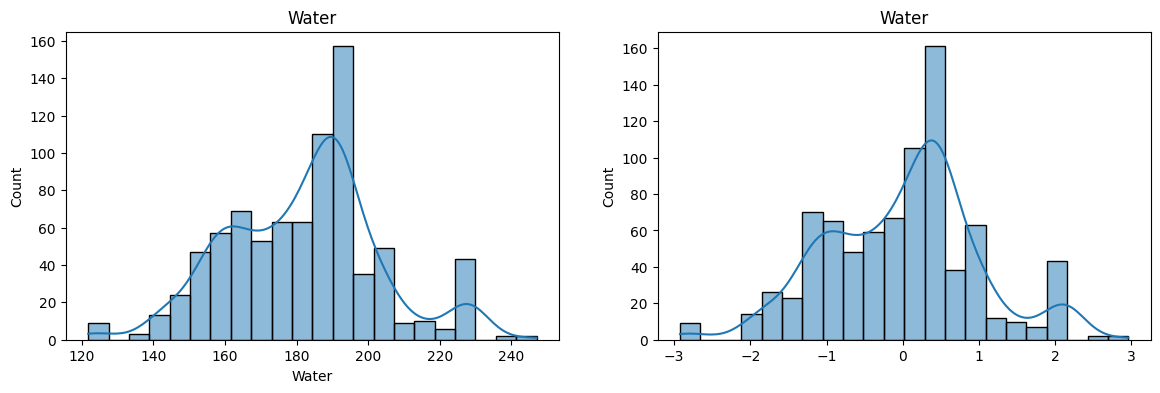

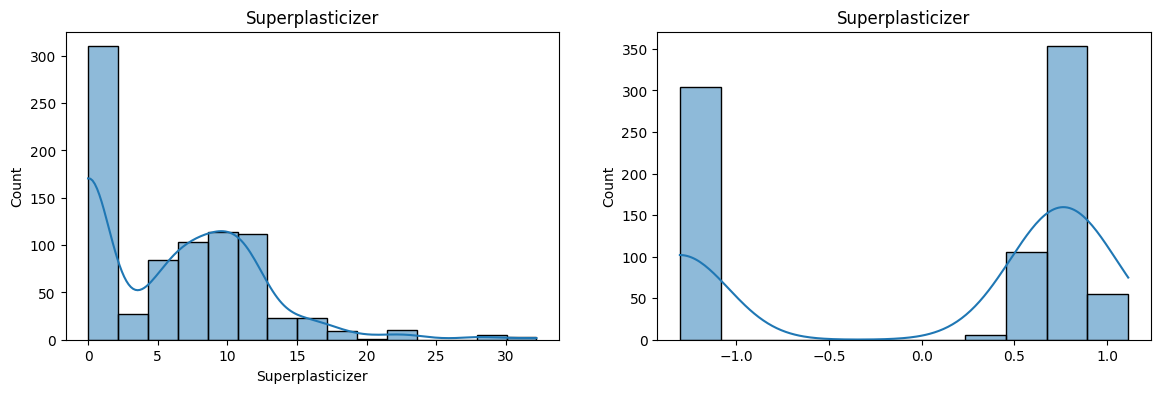

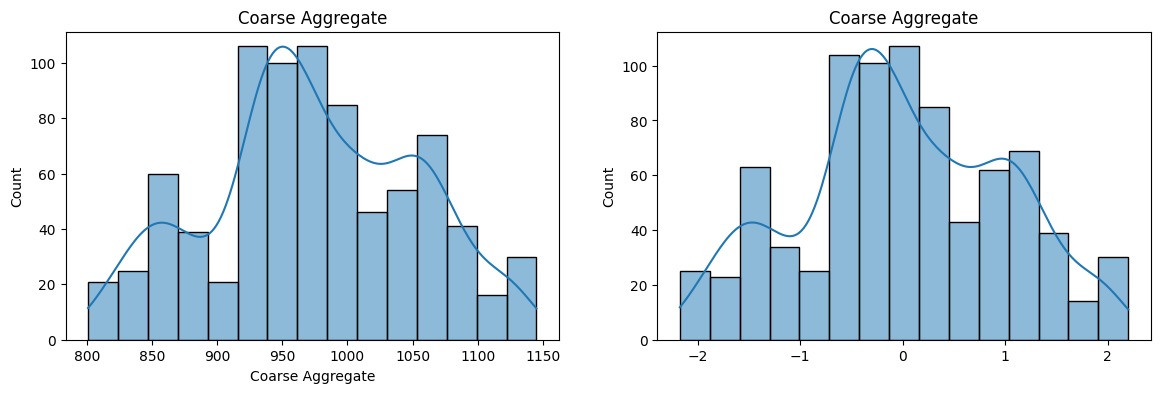

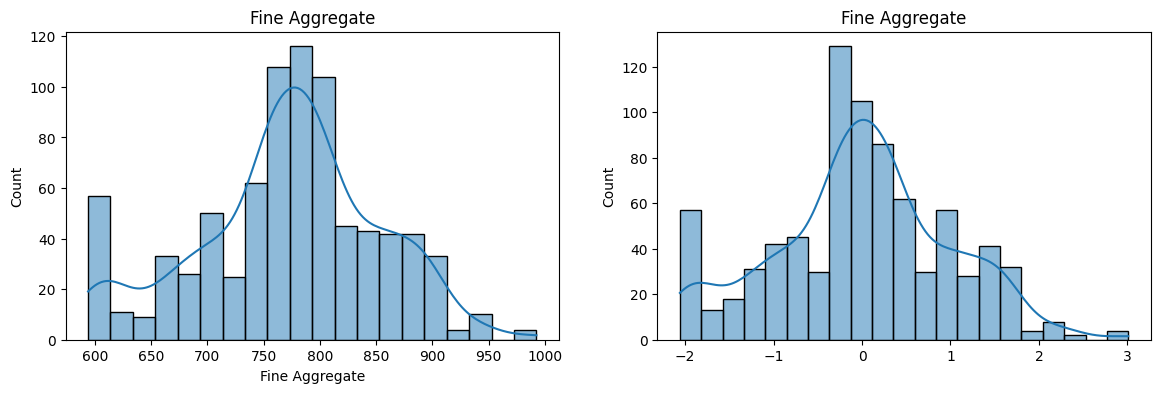

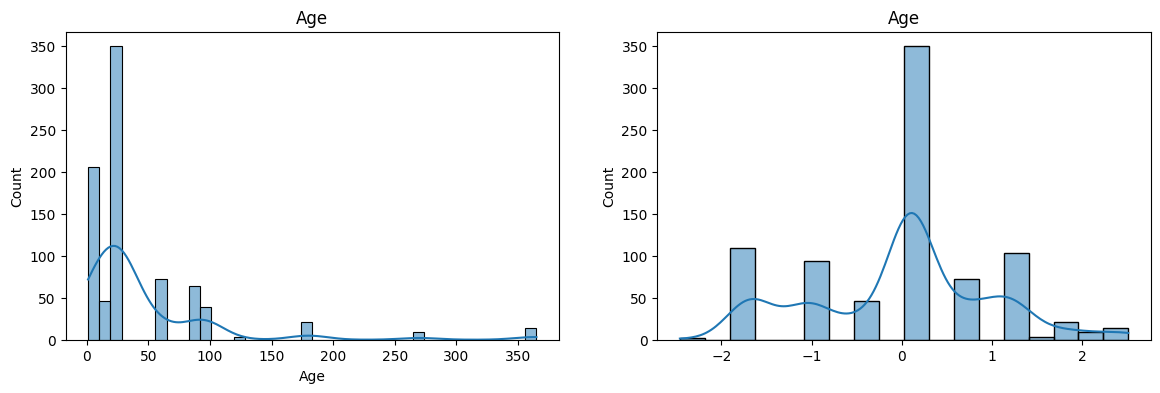

In [47]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(x_train_transform,columns=x_train.columns)

for i, col in enumerate(X_train_transformed.columns):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transform[:,i], kde=True)
    plt.title(col)

    plt.show()

#yeo-jhonson

In [59]:
pt1=PowerTransformer()
x_train_transformed=pt1.fit_transform(x_train)
x_test_transformed=pt1.transform(x_test)
l=LinearRegression()
l.fit(x_train_transformed,y_train)
y_pred1=l.predict(x_test_transformed)
r2_score(y_test,y_pred1)

0.8161906512004999

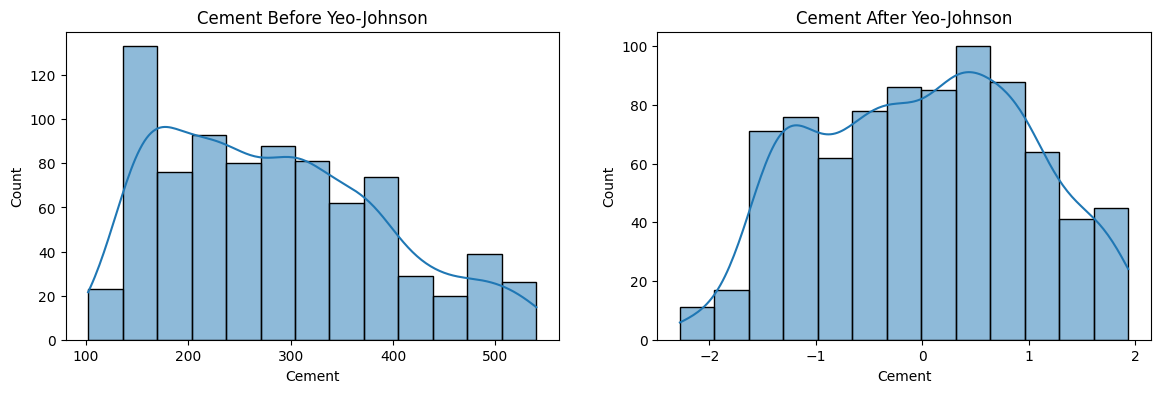

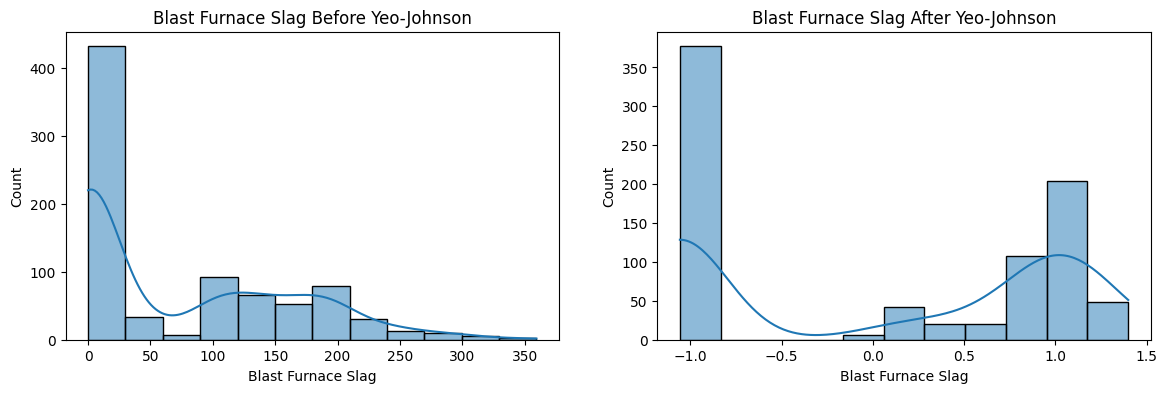

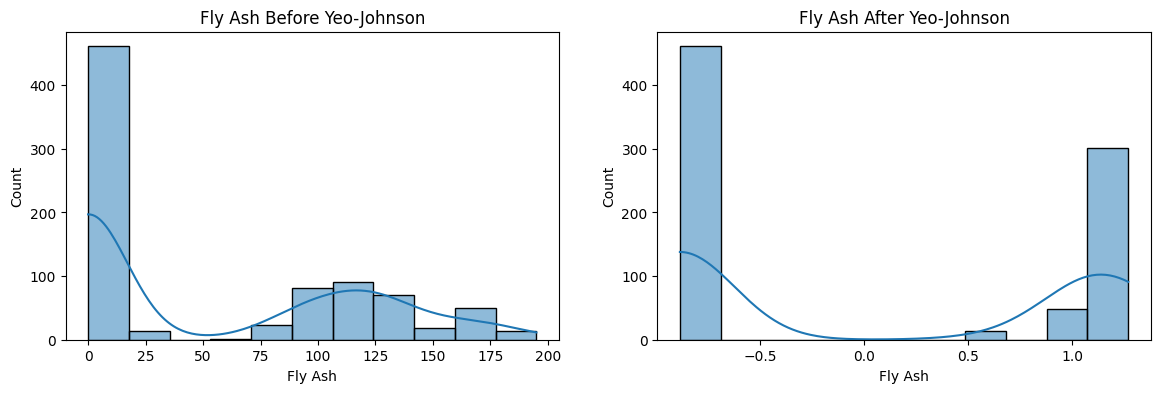

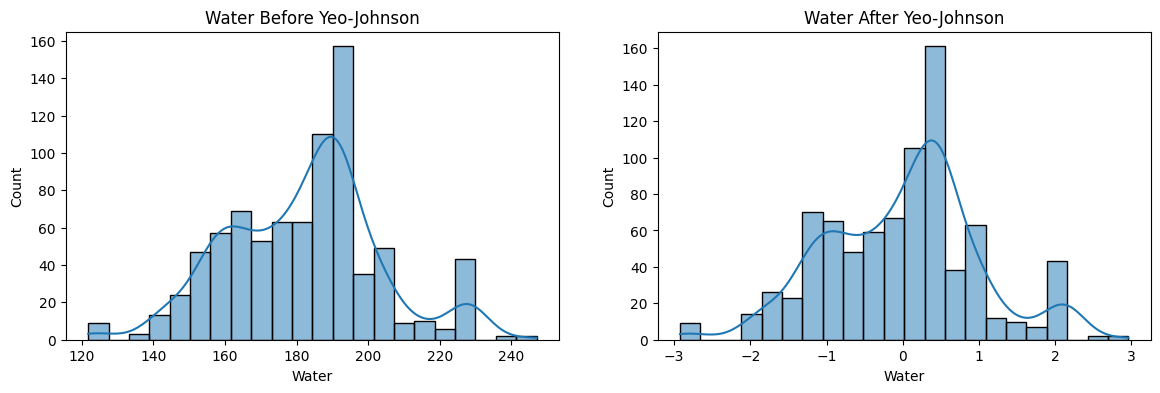

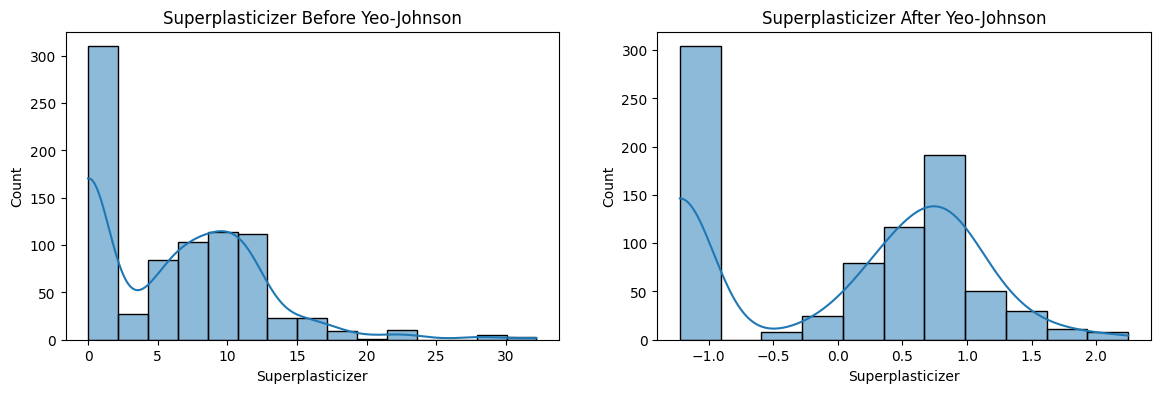

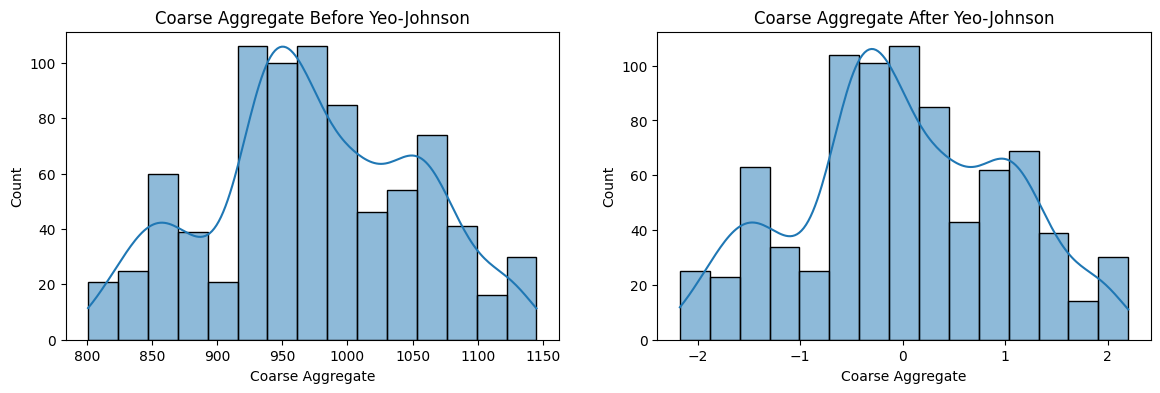

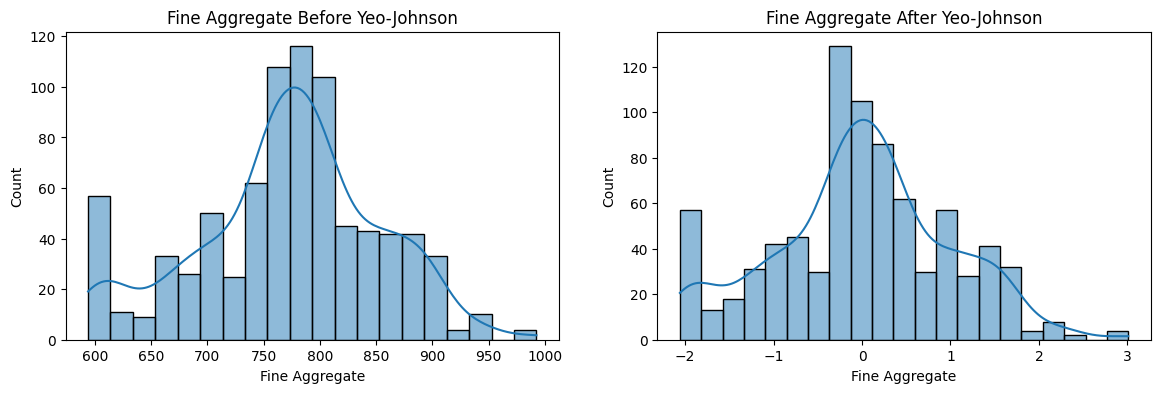

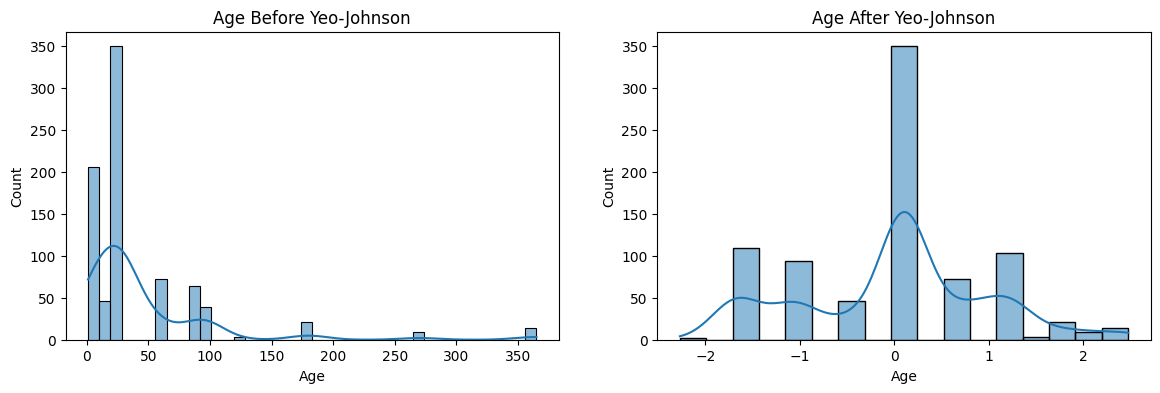

In [62]:

x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=x_train.columns)

for col in x_train_transformed_df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True) # Use histplot instead of distplot
    plt.title(f"{col} Before Yeo-Johnson")

    plt.subplot(122)
    sns.histplot(x_train_transformed_df[col], kde=True) # Use histplot and the DataFrame
    plt.title(f"{col} After Yeo-Johnson")

    plt.show()

In [64]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.215602,0.174348
1,Blast Furnace Slag,0.025996,0.015715
2,Fly Ash,-0.006544,-0.161447
3,Water,0.959062,0.771307
4,Superplasticizer,0.103365,0.253935
5,Coarse Aggregate,1.192492,1.130050
6,Fine Aggregate,1.973781,1.783100
7,Age,-0.014692,0.019885
